In [1]:
# author: René Kopeinig
# script: Basic Proba-V Time-Series Analysis
# description: Basic Proba-V NDVI (Normalized Difference Vegetation Index) Time-Series Analysis with 
#              help of Google Earth Engine Python API.
#              Note: Please make sure you have all dependencies in Python installed and you are signed up for Google Earth Engine.

In [2]:
# Add IPython-specific directive to display plots directly below the notebook cell
%matplotlib inline

In [3]:
# Import Dependencies
import ee, datetime
import pandas as pd
import matplotlib.dates as mdates
from IPython.display import Image
from matplotlib import dates
from pylab import *

ee.Initialize()

In [7]:
# Set start and end date
startTime = datetime.datetime(2015, 2, 3)
endTime = datetime.datetime(2015, 4, 15)

# Create image collection
collection = ee.ImageCollection('VITO/PROBAV/C1/S1_TOC_100M').filterDate(startTime, endTime)
# Create point in Luxembourg (Proba-V Footprint: X18Y02)
point = {'type':'Point', 'coordinates':[6.134136, 49.612485]};

In [8]:
#Retrieve information over image collection
info = collection.getRegion(point,500).getInfo()

In [9]:
# Reshape image collection 
header = info[0]
data = array(info[1:])

iTime = header.index('time')
time = [datetime.datetime.fromtimestamp(i/1000) for i in (data[0:,iTime].astype(int))]

# List of used image bands
band_list = ['RED',u'NIR']

iBands = [header.index(b) for b in band_list]
yData = data[0:,iBands].astype(np.float)

In [10]:
# Calculate NDVI
red = yData[:,0]
nir = yData[:,1]
ndvi = (nir - red) / (nir + red)

In [14]:
# Reshape NDVI array into Pandas Dataframe
df = pd.DataFrame(data=ndvi, index=list(range(len(ndvi))), columns=['NDVI'])
df = df.interpolate()
df['DateTime'] = pd.Series(time, index=df.index)

In [15]:
# Obtain statistical information over all elements of the Time-Series
df.describe()

,NDVI
count,71.000000
mean,0.121775
std,0.105253
min,0.006887
25%,0.025716
50%,0.088106
75%,0.227011
max,0.331023


In [16]:
# Introduce Maple's auto correlation"
def maple_auto_correlation(x):
    x = np.asarray(x)
    y = x-x.mean()
    result = np.correlate(y, y, mode='full')
    result = result[len(result)//2:]
    result /= result[0]
    return result 

In [17]:
# Apply auto correlation algorithm on dataframe
macf = maple_auto_correlation(df['NDVI'])

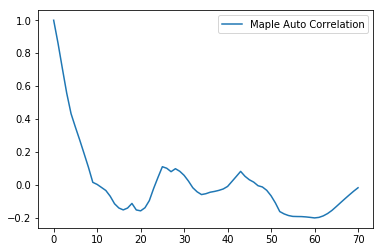

In [19]:
df_macf = pd.DataFrame(data=macf, index=list(range(len(macf))), columns=['Maple Auto Correlation'])
df_macf.plot()
plt.show()

In [20]:
# Reshape data for discrete Fourier Transformation
df_as_matrix = df['NDVI'].as_matrix()

/usr/local/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


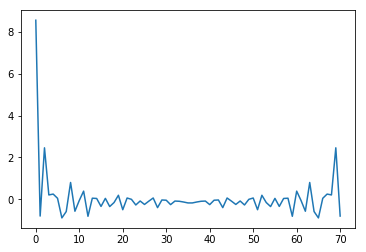

In [21]:
# Calculate and plot Fast Fourier Transformation
sp = np.fft.fft(np.sin(df_as_matrix))
plt.plot(sp)
plt.show()

In [22]:
# Outlier detection based on +3 to -3 standard deviations
df[np.abs(df.NDVI-df.NDVI.mean())<=(3*df.NDVI.std())]
df[~(np.abs(df.NDVI-df.NDVI.mean())>(3*df.NDVI.std()))] 

,NDVI,DateTime
0,0.051405,2015-02-03 01:00:00
1,0.044749,2015-02-04 01:00:00
2,0.038093,2015-02-05 01:00:00
3,0.031437,2015-02-06 01:00:00
4,0.024781,2015-02-07 01:00:00
5,0.018125,2015-02-08 01:00:00
6,0.015645,2015-02-09 01:00:00
7,0.013166,2015-02-10 01:00:00
8,0.010686,2015-02-11 01:00:00
9,0.008206,2015-02-12 01:00:00
